In [10]:
import pandas as pd

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv("/content/drive/MyDrive/price-prediction-ai/bitcoin-price.csv")

In [12]:
# Display the first few rows of the DataFrame to understand its structure
print(data.head())

  Currency        Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
0      BTC  2013-10-01            123.65499       124.30466       124.75166   
1      BTC  2013-10-02            125.45500       123.65499       125.75850   
2      BTC  2013-10-03            108.58483       125.45500       125.66566   
3      BTC  2013-10-04            118.67466       108.58483       118.67500   
4      BTC  2013-10-05            121.33866       118.67466       121.93633   

   24h Low (USD)  
0      122.56349  
1      123.63383  
2       83.32833  
3      107.05816  
4      118.00566  


In [14]:
# Check the data types and summary statistics of the dataset
print(data.info(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2613 non-null   object 
 1   Date                 2613 non-null   object 
 2   Closing Price (USD)  2613 non-null   float64
 3   24h Open (USD)       2613 non-null   float64
 4   24h High (USD)       2613 non-null   float64
 5   24h Low (USD)        2613 non-null   float64
dtypes: float64(4), object(2)
memory usage: 122.6+ KB
None


In [15]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

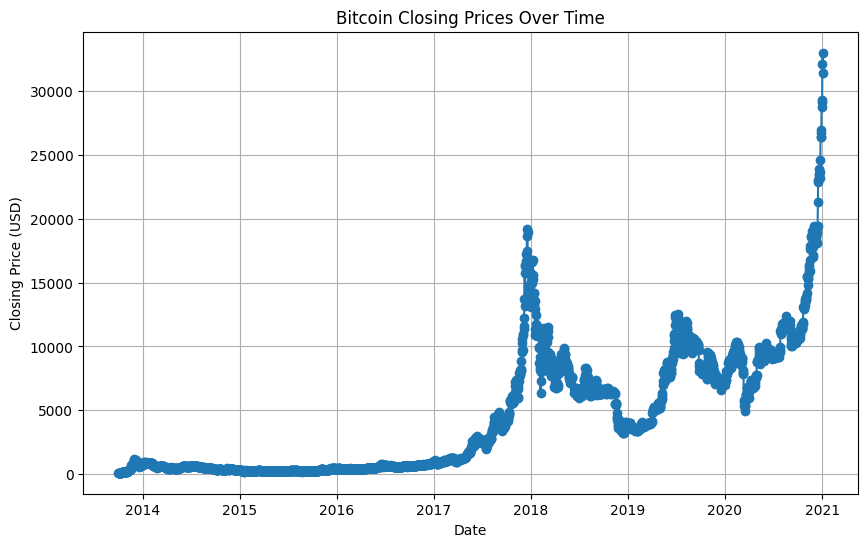

In [16]:
# Visualize the closing prices over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Closing Price (USD)'], marker='o', linestyle='-')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

In [27]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Extracting features (Closing Price) and target variable
X = data['Closing Price (USD)'].values.reshape(-1, 1)
y = data['Closing Price (USD)'].values.reshape(-1, 1)

In [29]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [31]:
# Define the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Dense(1)
])

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [34]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
2090/2090 [==============================] - 8s 3ms/step - loss: 20242226.0000
Epoch 2/50
2090/2090 [==============================] - 4s 2ms/step - loss: 19768124.0000
Epoch 3/50
2090/2090 [==============================] - 5s 3ms/step - loss: 19026632.0000
Epoch 4/50
2090/2090 [==============================] - 6s 3ms/step - loss: 18158170.0000
Epoch 5/50
2090/2090 [==============================] - 4s 2ms/step - loss: 17214334.0000
Epoch 6/50
2090/2090 [==============================] - 5s 2ms/step - loss: 16274501.0000
Epoch 7/50
2090/2090 [==============================] - 6s 3ms/step - loss: 15351331.0000
Epoch 8/50
2090/2090 [==============================] - 4s 2ms/step - loss: 14508666.0000
Epoch 9/50
2090/2090 [==============================] - 5s 3ms/step - loss: 13749897.0000
Epoch 10/50
2090/2090 [==============================] - 6s 3ms/step - loss: 13104647.0000
Epoch 11/50
2090/2090 [==============================] - 5s 2ms/step - loss: 12556707.0000
Epoch 12

In [35]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 3822473.0


In [36]:
# Predictions
predictions = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


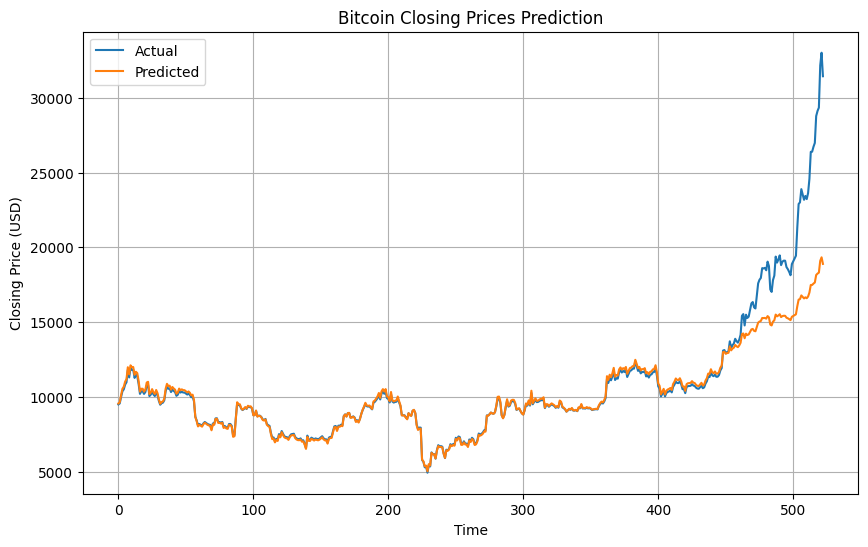

In [37]:
# Plotting predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Bitcoin Closing Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Normalize all the data
X_all = scaler.transform(X)

In [39]:
# Reshape for LSTM model
X_all = X_all.reshape((X_all.shape[0], 1, X_all.shape[1]))

In [40]:
# Train the model on all the data
model.fit(X_all, y, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
2613/2613 [==============================] - 7s 3ms/step - loss: 746006.6875
Epoch 2/50
2613/2613 [==============================] - 6s 2ms/step - loss: 661395.8125
Epoch 3/50
2613/2613 [==============================] - 8s 3ms/step - loss: 593188.0000
Epoch 4/50
2613/2613 [==============================] - 6s 2ms/step - loss: 531703.5000
Epoch 5/50
2613/2613 [==============================] - 7s 3ms/step - loss: 474033.7188
Epoch 6/50
2613/2613 [==============================] - 7s 3ms/step - loss: 426975.5625
Epoch 7/50
2613/2613 [==============================] - 6s 2ms/step - loss: 386078.5625
Epoch 8/50
2613/2613 [==============================] - 7s 3ms/step - loss: 349166.6875
Epoch 9/50
2613/2613 [==============================] - 6s 2ms/step - loss: 314861.9062
Epoch 10/50
2613/2613 [==============================] - 8s 3ms/step - loss: 285750.4062
Epoch 11/50
2613/2613 [==============================] - 6s 2ms/step - loss: 260281.9531
Epoch 12/50
2613/2613 [=======

In [41]:
# Create a sequence of future dates
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=3*365, freq='D')[1:]

In [46]:
# Predict future prices
future_prices = []
current_price = X_all[-1]  # Start with the last available price

In [58]:
# Define a wider maximum and minimum price range for predictions
max_price = data['Closing Price (USD)'].max() * 2  # Double the maximum historical price
min_price = data['Closing Price (USD)'].min() * 0.5  # 50% of the minimum historical pricerice

In [59]:
for i in range(3*365):
    # Predict the next price
    prediction = model.predict(current_price.reshape(1, 1, 1))[0][0]

    # Scale the prediction within the defined range
    prediction = max(min(prediction, max_price), min_price)

    # Append the prediction to the list of future prices
    future_prices.append(prediction)

    # Update current price for the next prediction
    current_price = np.array([[prediction]])

1/1 [==============================] - 0s 32ms/step


In [60]:
# Create a sequence of future dates based on the number of predicted prices
future_dates = pd.date_range(start=last_date, periods=len(future_prices), freq='D')

In [61]:
# Create a DataFrame for the predictions
future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price (USD)': future_prices})

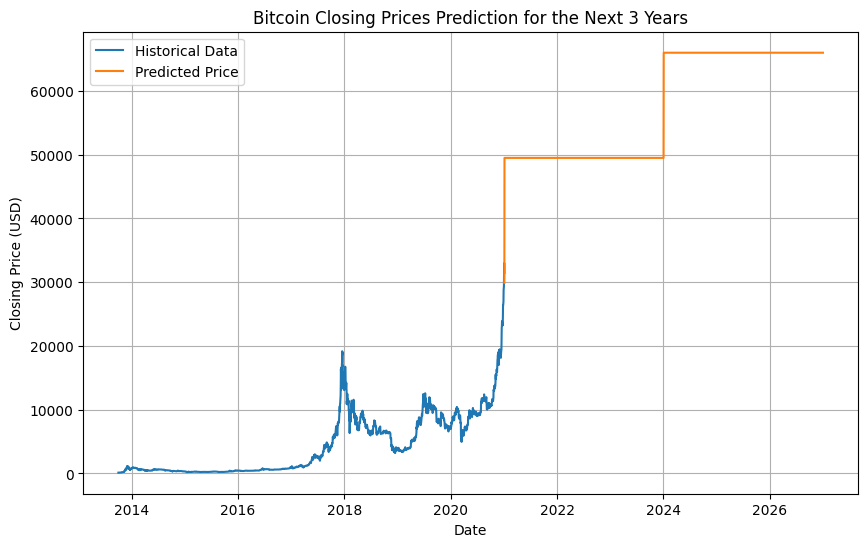

In [62]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Closing Price (USD)'], label='Historical Data')
plt.plot(future_data['Date'], future_data['Predicted Price (USD)'], label='Predicted Price')
plt.title('Bitcoin Closing Prices Prediction for the Next 3 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()